In [1]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:455: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:456: FutureWarning

In [2]:
df = pd.read_csv( 'crop_production.csv')
df = df.groupby(['Crop']).head(500)
print(df.columns)
df.loc[0]

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')


State_Name       Andaman and Nicobar Islands
District_Name                       NICOBARS
Crop_Year                               2000
Season                           Kharif     
Crop                                Arecanut
Area                                    1254
Production                              2000
Name: 0, dtype: object

In [0]:
# labelencoder = LabelEncoder()
# df2 = df
# df2['State_Name'] = labelencoder.fit_transform(df2['State_Name'].values)
# df2['District_Name'] = labelencoder.fit_transform(df2['District_Name'].values)
# df2['Season'] = labelencoder.fit_transform(df2['Season'].values)
# df2['Crop'] = labelencoder.fit_transform(df2['Crop'].values)
# df2.loc[0]

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


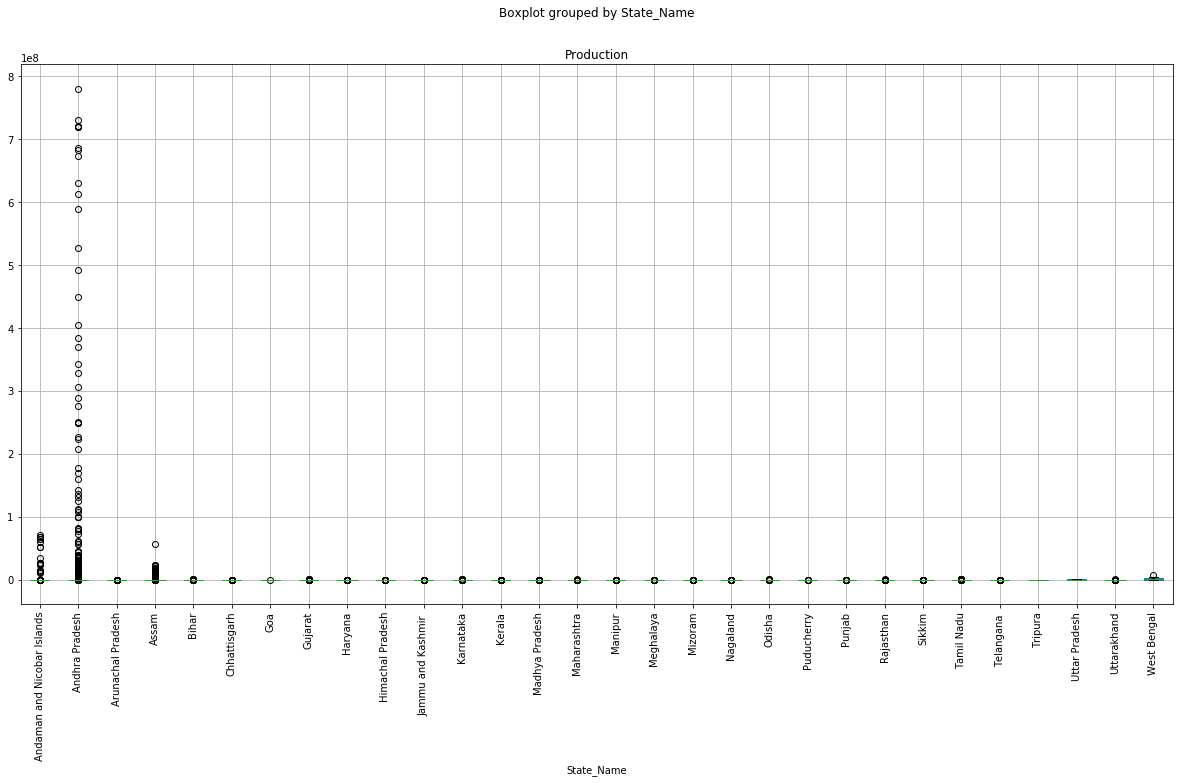

In [7]:
df.boxplot(column='Production', by='State_Name', figsize=(20,10), rot=90)

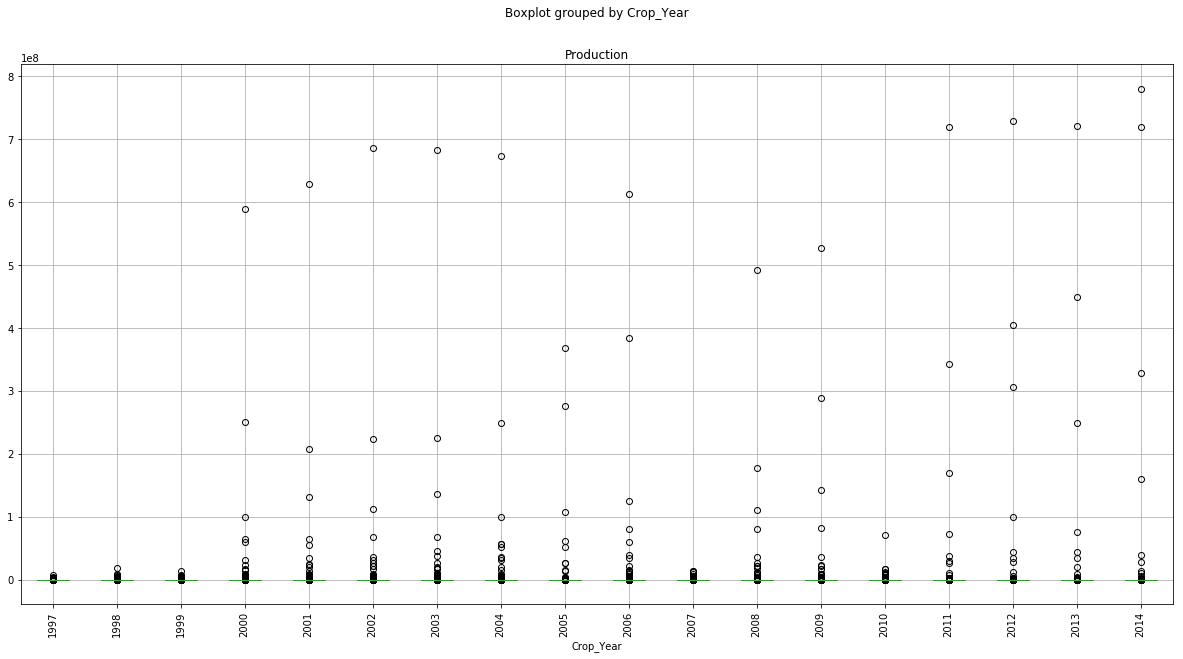

In [0]:
df.boxplot(column='Production', by='Crop_Year', figsize=(20,10), rot=90)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


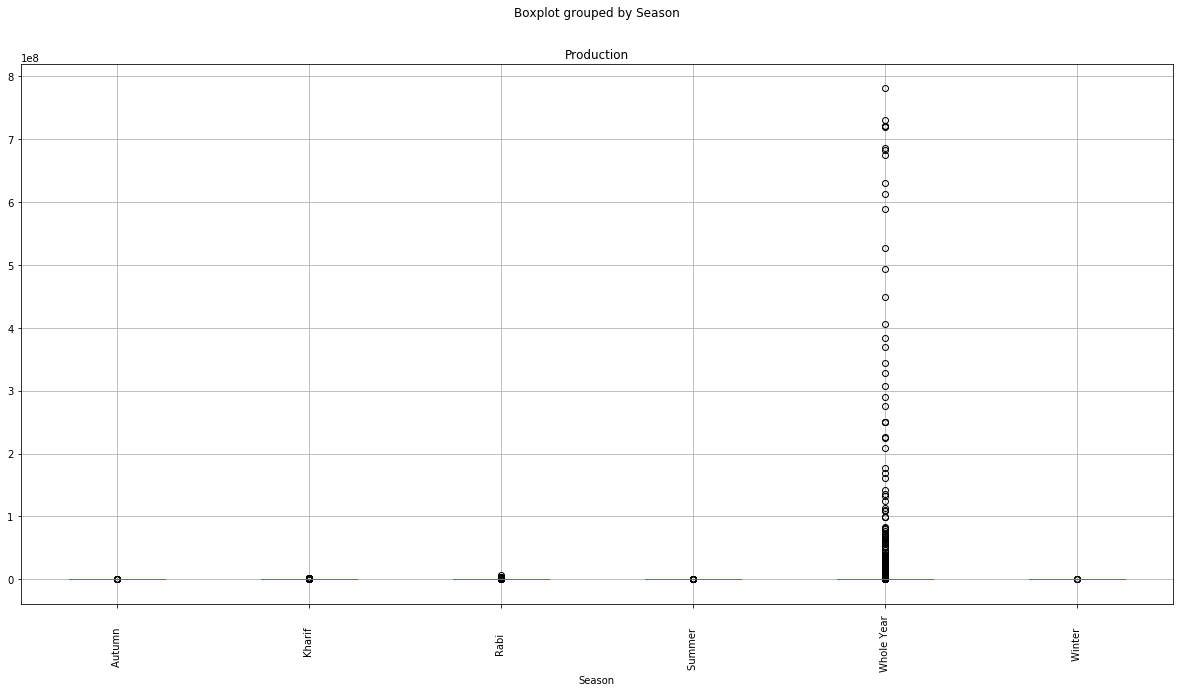

In [8]:
df.boxplot(column='Production', by='Season', figsize=(20,10), rot=90)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


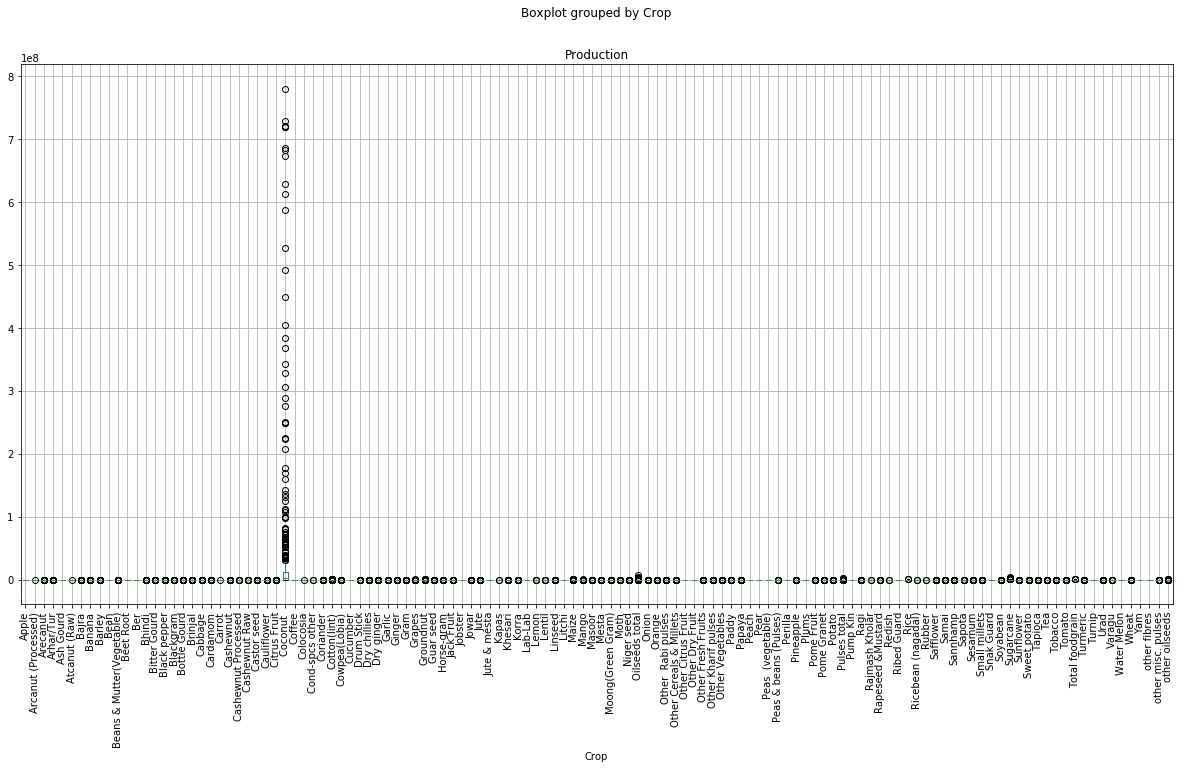

In [4]:
df.boxplot(column='Production', by='Crop', figsize=(20,10), rot=90)

In [5]:
cropsList = df['Crop'].unique()
medians = {}
sum = {}

for crop in cropsList:
  p = df[df.Crop == crop]
  medians[crop] = p.median().Production
  sum[crop] = p.sum().Production

In [6]:
items = sum.items()
prodVals = []

for item in items: 
  prodVals.append(item[1]) 

prodVals = [(x - min(prodVals)) / (max(prodVals) - min(prodVals)) for x in prodVals]

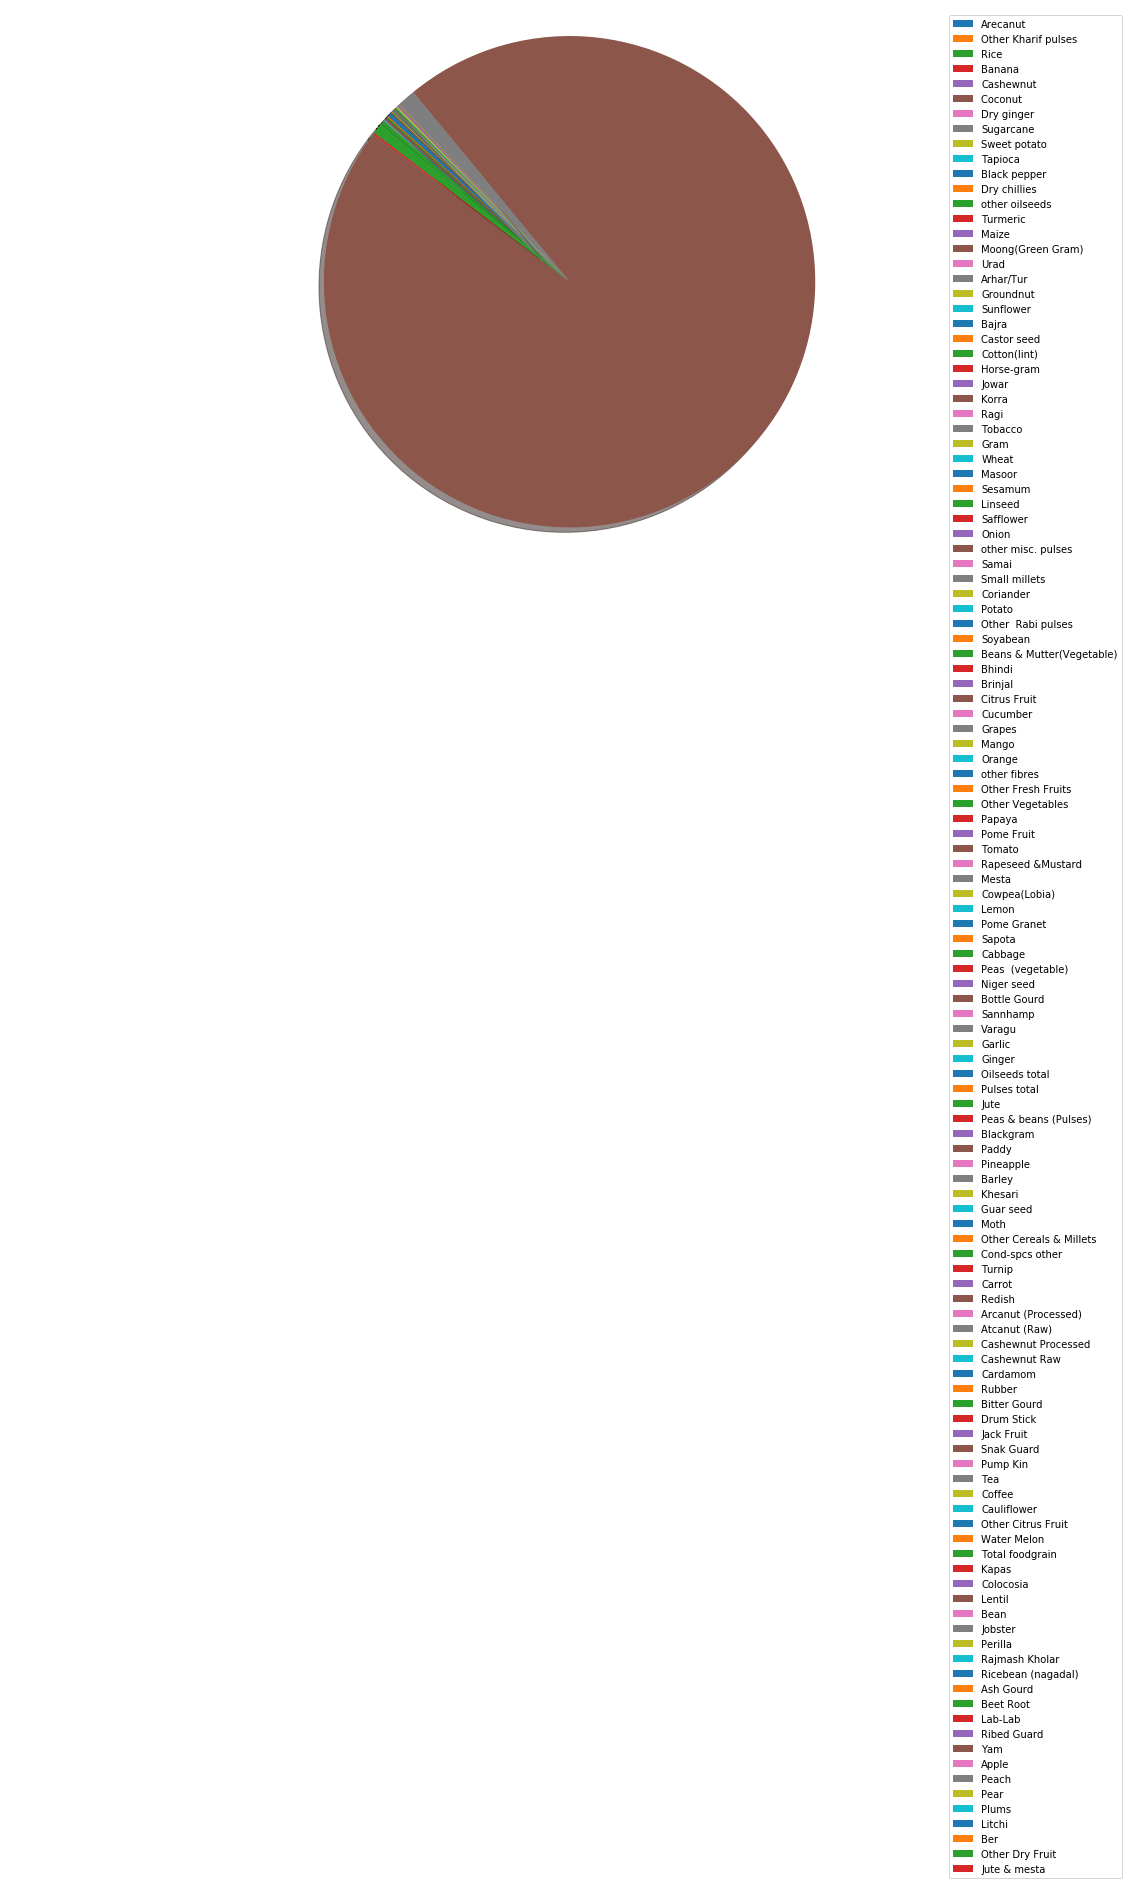

In [0]:
index = np.arange(len(cropsList))

plt.figure(figsize=(20,10))

patches, texts = plt.pie(prodVals, shadow=True, startangle=140)
plt.legend(patches, cropsList, loc="best")
plt.axis('equal')
plt.show()

In [0]:
for i in range(len(df)):
  if medians[df.iloc[i, 4]] > df.iloc[i, -1]:
    df.iloc[i, -1] = 'High'
  else:
    df.iloc[i, -1] = 'Low'

In [0]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [0]:
X_encoded = pd.get_dummies(X, columns = ['State_Name', 'District_Name', 'Season', 'Crop'])

In [0]:
X_encoded = X_encoded.apply(zscore)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2)

## LOGISTIC REGRESSION

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logistic_model.predict(X_test)

In [0]:
print(np.array(y_test))
print(predictions)

['Low' 'Low' 'Low' ... 'High' 'Low' 'High']
['Low' 'High' 'Low' ... 'Low' 'Low' 'High']


In [0]:
print(logistic_model.score(X_test, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7652840005781182
[[2320  814]
 [ 810 2975]]
              precision    recall  f1-score   support

        High       0.74      0.74      0.74      3134
         Low       0.79      0.79      0.79      3785

    accuracy                           0.77      6919
   macro avg       0.76      0.76      0.76      6919
weighted avg       0.77      0.77      0.77      6919



## SVM

In [0]:
from sklearn.svm import SVC

In [0]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
predictions = svclassifier.predict(X_test)

In [0]:
print(np.array(y_test))
print(predictions)

['Low' 'Low' 'Low' ... 'High' 'Low' 'High']
['Low' 'High' 'Low' ... 'Low' 'Low' 'High']


In [0]:
print(svclassifier.score(X_test, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7597918774389363
[[2287  847]
 [ 815 2970]]
              precision    recall  f1-score   support

        High       0.74      0.73      0.73      3134
         Low       0.78      0.78      0.78      3785

    accuracy                           0.76      6919
   macro avg       0.76      0.76      0.76      6919
weighted avg       0.76      0.76      0.76      6919

